In [45]:
from itertools import combinations

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [46]:
iris = load_iris(as_frame = True)

df = iris['data']
df.columns = ['s_length', 's_width', 'p_length', 'p_width']

full_df = df.copy()
full_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Задание 1

<Axes: >

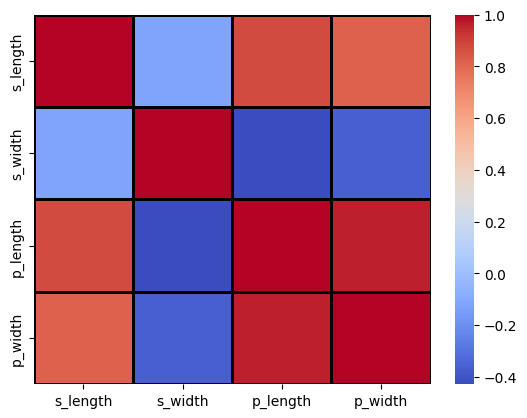

In [47]:
sns.heatmap(df.corr(), cmap = 'coolwarm', linewidths = 2, linecolor = 'black')

<Axes: ylabel='species-None'>

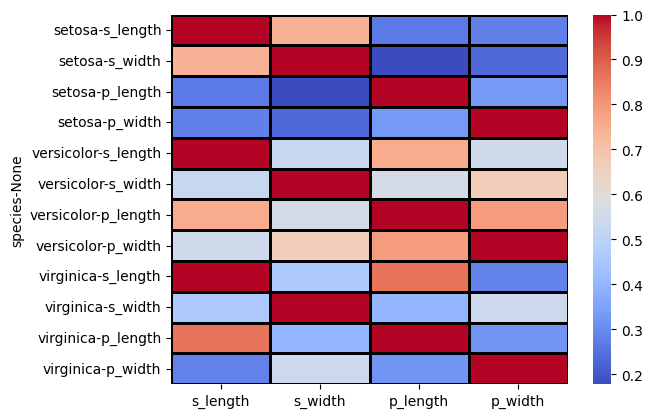

In [48]:
df_groups = df.groupby(full_df['species'], observed = True)
sns.heatmap(df_groups.corr(), cmap = 'coolwarm', linewidths = 2, linecolor = 'black')

In [57]:
def draw_pairplot():
    sns.pairplot(full_df, hue = 'species', markers = ['P', 's', 'o'], \
                 plot_kws = {'edgecolor' : 'black'}, palette = ['#FF0000', '#00FF00', '#0000FF'])

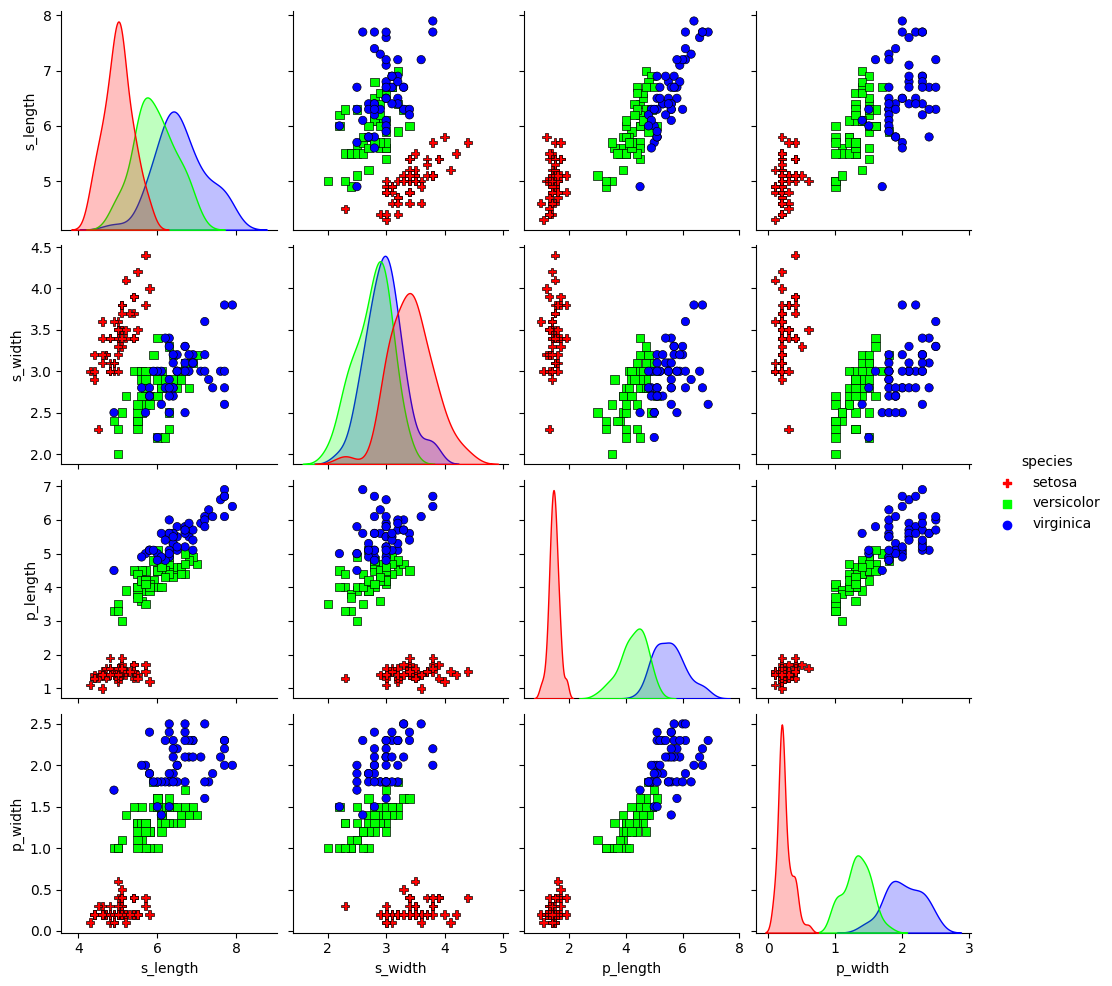

In [58]:
draw_pairplot()

## Задание 2

In [ ]:
def show_distrib(x, y, xlabel, ylabel):
    
    ax = plt.axes()

    for l, c, m in zip(iris.target.unique(), ['r','g','b'], ['s', 'x', 'o']):

        ax.scatter(x[iris.target == l], y[iris.target == l], \
            c = c, marker = m, label = iris.target_names[l], edgecolors = 'black')

    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    return ax

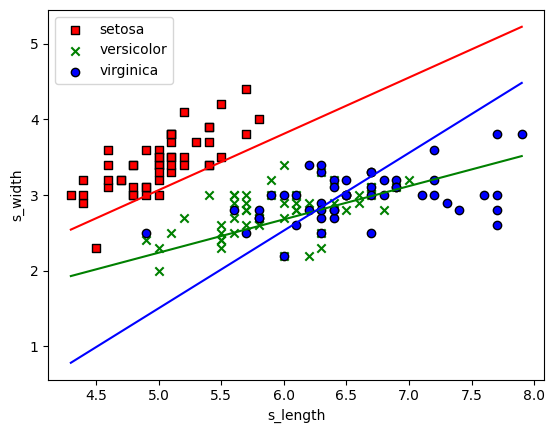

In [61]:
cols = np.random.choice(df.columns.values, 2)

ax = show_distrib(df[cols[0]], df[cols[1]], cols[0], cols[1])

lda = LinearDiscriminantAnalysis()
lda.fit(df[cols], iris.target)

x = np.linspace(np.min(df[cols[0]], axis = 0), np.max(df[cols[0]], axis = 0), len(df[cols[0]]))

for i, c in enumerate(['r','g','b']):
    b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
    y = -(b + x * w1) / w2    
    ax.plot(x, y, c = c)
        
plt.show()

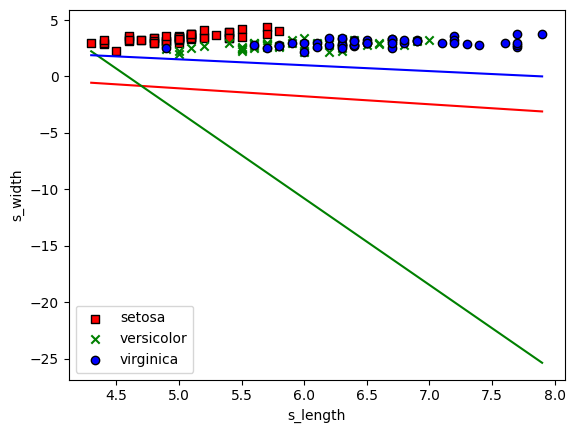

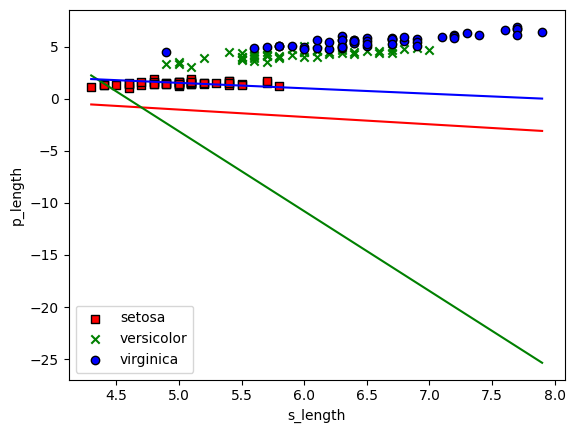

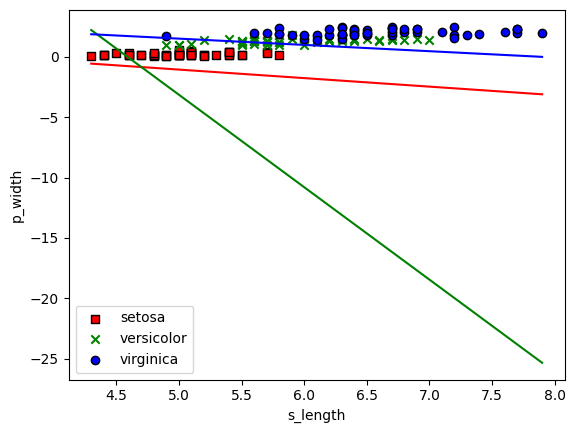

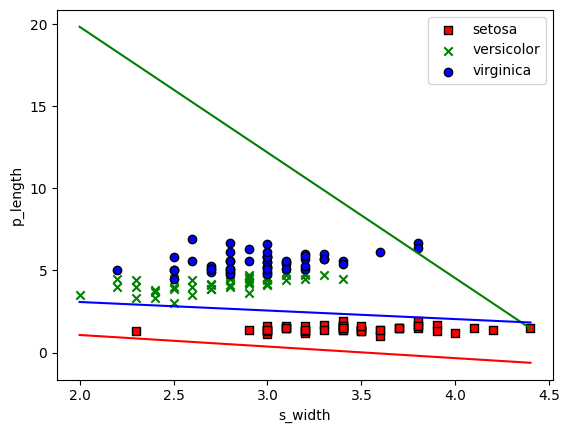

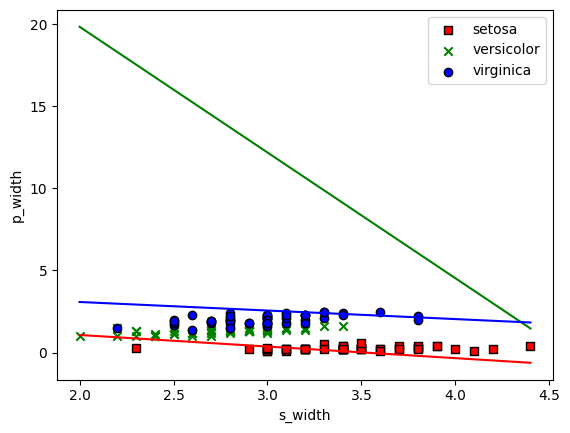

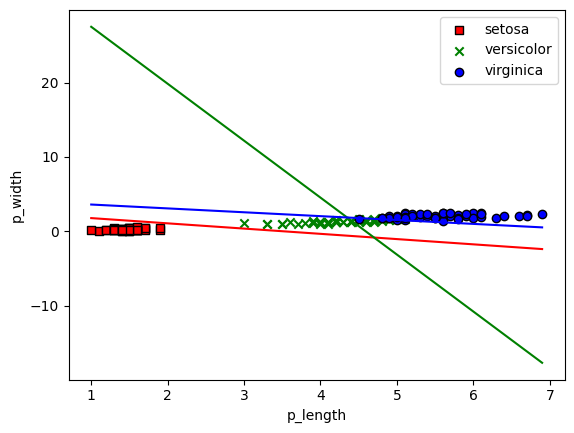

In [51]:
cols = list(df.columns.values) 

for col1, col2 in combinations(cols, 2):       
    ax = show_distrib(df[col1], df[col2], col1, col2)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(df[[col1, col2]], iris.target)

    x = np.linspace(np.min(df[col1], axis = 0), np.max(df[col1], axis = 0), len(df[col1]))

    for i, c in enumerate(['r','g','b']):
        b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
        y = -(b + x * w1) / w2    
        ax.plot(x, y, c = c)
        
    plt.show()